In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Importing data

In [ ]:
import os
dataset_path="/content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset/"
path_tpn=dataset_path+"/tPN/"
path_tpb2=dataset_path+"/tPB2/"


tpn_dir=os.path.join(path_tpn)
tpb2_dir = os.path.join(path_tpb2)


In [ ]:
import os
train_tpb2 = os.listdir(tpb2_dir)
print('tPB2 samples:')
print(train_tpb2[:5])
print()
print('tPN samples:')
train_tpn = os.listdir(tpn_dir)
print(train_tpn[:5])

tPB2 samples:
['D2011.02.25_S0047_I132_WELL6_RUN5.jpeg', 'D2011.04.25_S0114_I132_WELL1_RUN15.jpeg', 'D2011.03.21_S0074_I132_WELL3_RUN2.jpeg', 'D2011.04.22_S0112_I132_WELL3_RUN9.jpeg', 'D2011.05.17_S0138_I132_WELL1_RUN6.jpeg']

tPN samples:
['D2013.02.05_S0728_I132_WELL3_RUN38.jpeg', 'D2016.11.25_S1782_I132_WELL5_RUN77.jpeg', 'D2013.02.22_S0745_I132_WELL1_RUN92.jpeg', 'D2016.11.23_S0540_I647_WELL1_RUN95.jpeg', 'D2015.03.13_S0071_I647_WELL2_RUN74.jpeg']


####Number of frames per class

In [ ]:
T2=len(os.listdir(tpb2_dir))
TN=len(os.listdir(tpn_dir))
print('total tPB2 images:', T2)
print('total tPN images:', TN)


total tPB2 images: 470
total tPN images: 627


<BarContainer object of 2 artists>

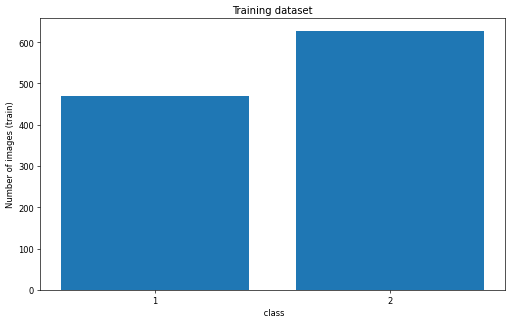

In [ ]:
import matplotlib.pyplot as plt

nb_imgs=[T2,TN]
bins = [ '1', '2']
plt.figure(figsize=(10, 6),dpi=60)
plt.ylabel('Number of images (train)')
plt.xlabel(' class')
plt.title('Training dataset')
plt.bar( bins , nb_imgs)



**Splitting Dataset to train, validation and test before training**


In [ ]:
import os
import random
import shutil


class SplitDataset():
    def __init__(self, dataset_dir, saved_dataset_dir, train_ratio=0.8, test_ratio=0.15, show_progress=True):
        self.dataset_dir = dataset_dir
        self.saved_dataset_dir = saved_dataset_dir
        self.saved_train_dir = saved_dataset_dir + "/train/"
        self.saved_valid_dir = saved_dataset_dir + "/valid/"
        self.saved_test_dir = saved_dataset_dir + "/test/"


        self.train_ratio = train_ratio
        self.test_radio = test_ratio
        self.valid_ratio = 1 - train_ratio - test_ratio

        self.train_file_path = []
        self.valid_file_path = []
        self.test_file_path = []

        self.index_label_dict = {}

        self.show_progress = show_progress

        if not os.path.exists(self.saved_train_dir):
            os.mkdir(self.saved_train_dir)
        if not os.path.exists(self.saved_test_dir):
            os.mkdir(self.saved_test_dir)
        if not os.path.exists(self.saved_valid_dir):
            os.mkdir(self.saved_valid_dir)


    def __get_label_names(self):
        label_names = []
        for item in os.listdir(self.dataset_dir):
            item_path = os.path.join(self.dataset_dir, item)
            if os.path.isdir(item_path):
                label_names.append(item)
        return label_names

    def __get_all_file_path(self):
        all_file_path = []
        index = 0
        for file_type in self.__get_label_names():
            self.index_label_dict[index] = file_type
            index += 1
            type_file_path = os.path.join(self.dataset_dir, file_type)
            file_path = []
            for file in os.listdir(type_file_path):
                single_file_path = os.path.join(type_file_path, file)
                file_path.append(single_file_path)
            all_file_path.append(file_path)
        return all_file_path

    def __copy_files(self, type_path, type_saved_dir):
        for item in type_path:
            src_path_list = item[1]
            dst_path = type_saved_dir + "%s/" % (item[0])
            if not os.path.exists(dst_path):
                os.mkdir(dst_path)
            for src_path in src_path_list:
                shutil.move(src_path, dst_path)
                if self.show_progress:
                    print("Copying file "+src_path+" to "+dst_path)

    def __split_dataset(self):
        all_file_paths = self.__get_all_file_path()
        for index in range(len(all_file_paths)):
            file_path_list = all_file_paths[index]
            file_path_list_length = len(file_path_list)
            random.shuffle(file_path_list)

            train_num = int(file_path_list_length * self.train_ratio)
            test_num = int(file_path_list_length * self.test_radio)

            self.train_file_path.append([self.index_label_dict[index], file_path_list[: train_num]])
            self.test_file_path.append([self.index_label_dict[index], file_path_list[train_num:train_num + test_num]])
            self.valid_file_path.append([self.index_label_dict[index], file_path_list[train_num + test_num:]])

    def start_splitting(self):
        self.__split_dataset()
        self.__copy_files(type_path=self.train_file_path, type_saved_dir=self.saved_train_dir)
        self.__copy_files(type_path=self.valid_file_path, type_saved_dir=self.saved_valid_dir)
        self.__copy_files(type_path=self.test_file_path, type_saved_dir=self.saved_test_dir)


if __name__ == '__main__':
    split_dataset = SplitDataset(dataset_dir="/content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset",
                                 saved_dataset_dir="/content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset",
                                 show_progress=True)
    split_dataset.start_splitting()

Copying file /content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset/tPN/D2013.03.13_S0763_I132_WELL2_RUN64.jpeg to /content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset/train/tPN/
Copying file /content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset/tPN/D2011.11.02_S0278_I132_WELL4_RUN108.jpeg to /content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset/train/tPN/
Copying file /content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset/tPN/D2013.06.08_S0844_I132_WELL3_RUN78.jpeg to /content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset/train/tPN/
Copying file /content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset/tPN/D2013.06.12_S0850_I132_WELL4_RUN92.jpeg to /content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset/train/tPN/
Copying file /content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset/tPN/D2017.04.19_S0676_I647_WELL6_RUN76.jpeg to /content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset/train/tPN/
Copying file /content/drive/MyDrive/Colab Notebooks/XA

###Handling data with ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path="/content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset/train"
valid_path="/content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset/valid"
testing_dir="/content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset/test"

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
testing_datagen = ImageDataGenerator(rescale=1. / 255)

  
SIZE=(224,224)
batch_size=100
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_path,  # This is the source directory for training images
        target_size=SIZE,  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['tPB2','tPN'],
        class_mode='categorical', 
        shuffle=True,
     )

validation_generator = validation_datagen.flow_from_directory(
    valid_path,
    
    target_size=SIZE,
    batch_size=batch_size,
    classes = ['tPB2','tPN'],
    class_mode='categorical', 
    shuffle=False ,
   # subset='validation'
   ) # set as validation data


testing_generator = testing_datagen.flow_from_directory(
    testing_dir,
    classes = ['tPB2','tPN'],
    target_size=SIZE,
    batch_size=batch_size,
    shuffle=False)

Found 1097 images belonging to 2 classes.
Found 71 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


# CNN Model

In [11]:
!pip install efficientnet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 6.5 MB/s eta 0:00:00


In [12]:
import efficientnet.tfkeras as efn
import tensorflow as tf

# Define the model
base_model = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the base model
base_model.trainable = True


for layer in base_model.layers[:-5]:
    layer.trainable = False
for layer in base_model.layers[-5:]:
    layer.trainable = True


# Add a new dense layer for binary classification
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(.3)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(.3)(x)

x = tf.keras.layers.Dense(64, activation='relu')(x)

x = tf.keras.layers.Dense(2, activation='softmax')(x)

# Create the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)



16804768/16804768 [==============================] - 3s 0us/step


In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
from tensorflow.keras.optimizers import Adam,Adagrad,SGD

model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#### Model Training

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

#Early stopping to avoid overfitting of model
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=12)

n_epochs=35

#PLOTTING ARCHITECTURE OF THE MODEL IN DRIVE
plot_model (model, to_file="/content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/1.png", show_shapes=True)


# fit 
history = model.fit_generator(train_generator, epochs=n_epochs,
                              shuffle=True,
                              validation_data = validation_generator, 
                              verbose = 1,
                              callbacks=[early_stop])


<ipython-input-7-7f2d5667379b>:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=n_epochs,


Epoch 1/35
11/11 [==============================] - 77s 6s/step - loss: 0.6715 - accuracy: 0.5770 - val_loss: 0.6149 - val_accuracy: 0.6761
Epoch 2/35
11/11 [==============================] - 66s 6s/step - loss: 0.5373 - accuracy: 0.7858 - val_loss: 0.5193 - val_accuracy: 0.8310
Epoch 3/35
11/11 [==============================] - 65s 6s/step - loss: 0.4456 - accuracy: 0.8350 - val_loss: 0.4493 - val_accuracy: 0.8592
Epoch 4/35
11/11 [==============================] - 66s 6s/step - loss: 0.3716 - accuracy: 0.8696 - val_loss: 0.3895 - val_accuracy: 0.8873
Epoch 5/35
11/11 [==============================] - 66s 6s/step - loss: 0.3265 - accuracy: 0.8769 - val_loss: 0.3439 - val_accuracy: 0.9155
Epoch 6/35
11/11 [==============================] - 65s 6s/step - loss: 0.3009 - accuracy: 0.8870 - val_loss: 0.3157 - val_accuracy: 0.9155
Epoch 7/35
11/11 [==============================] - 65s 6s/step - loss: 0.2749 - accuracy: 0.8924 - val_loss: 0.2946 - val_accuracy: 0.9155
Epoch 8/35
11/11 [==

## Accuracy & Test results

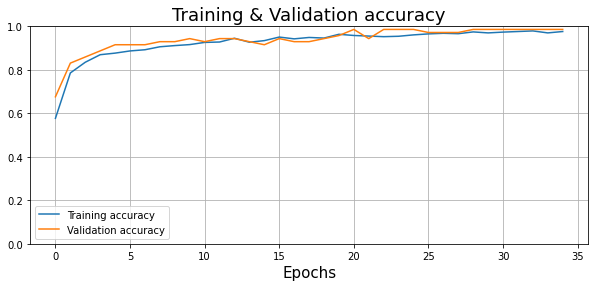

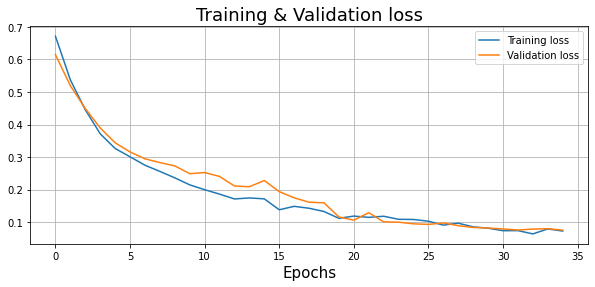

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


epochs = range(len(acc))
plt.figure(figsize=(10 ,4))
plt.grid(True)
ymin, ymax = plt.ylim()

plt.ylim(ymin * 3, ymax)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training & Validation accuracy',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
#plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/other_arch/1.png")

plt.show()


# Plot loss results
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(10,4))
plt.grid(True)

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training & Validation loss',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
plt.show()


###Confusion matrix

In [ ]:
#@title
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

In [ ]:
#@title
import matplotlib.pyplot as plt
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


<ipython-input-9-4829598cd4ed>:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(testing_generator)


Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

        tPB2       0.92      0.90      0.91        88
         tPN       0.92      0.94      0.93       117

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



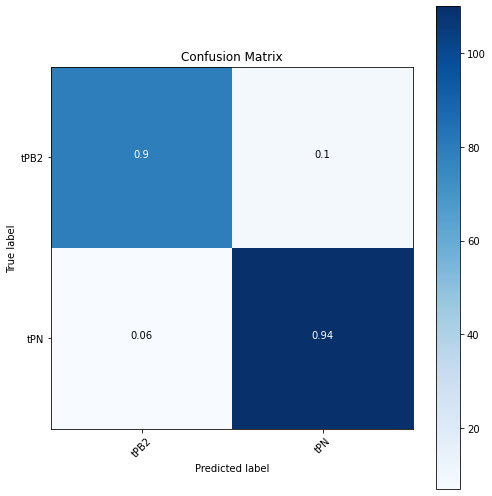

In [ ]:
import numpy as np

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 

target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(testing_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(testing_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(testing_generator.classes, y_pred, target_names=target_names))

### Saving the model in disk

In [2]:
model_path= '/content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/model.h5'

In [ ]:
model.save(model_path)

# GradCAM function

In [8]:
import tensorflow
from tensorflow.keras.models import load_model


In [13]:
model = load_model(model_path)

In [14]:
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2

class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
       
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            
            loss = predictions[:, tf.argmax(predictions[0])]
    
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)


#### Testing GradCAM with a test image

####We choose 2 tPN images to visualize their heatmaps

In [35]:
image_path1="/content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset/train/tPN/D2013.04.11_S0793_I132_WELL7_RUN60.jpeg"
image_path2="/content/drive/MyDrive/Colab Notebooks/XAI/GradCAM/dataset/train/tPN/D2011.06.10_S0168_I132_WELL2_RUN59.jpeg"

### Predicition of the image class and calculating gradients & GradCAM

In [ ]:
for idx in range(len(model.layers)):
  print(model.get_layer(index = idx).name)

In [36]:
testImgs = [image_path1,image_path2]
images=[]
heatmaps=[]
outputs=[]
for i,img in enumerate(testImgs):

  image = cv2.imread(img)
  image = cv2.resize(image, (224,224))
  image = image.astype('float32') / 255
  image = np.expand_dims(image, axis=0)

  preds = model.predict(image) 
  prediction = np.argmax(preds[0])

  class_id='tPN' if prediction==1 else 'tPB2'
  print('Image' ,i,'is : ',class_id)

  icam = GradCAM(model, prediction, 'block7a_project_conv')   # last conv layer of the trained model
  heatmap = icam.compute_heatmap(image)
  heatmap = cv2.resize(heatmap, (224,224))

  image = cv2.imread(img)
  image = cv2.resize(image, (224,224))
  #print(heatmap.shape, image.shape)

  (heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.4)
  images.append(image)
  heatmaps.append(heatmap)
  outputs.append(output)

1/1 [==============================] - 0s 29ms/step
Image 0 is :  tPN
1/1 [==============================] - 0s 25ms/step
Image 1 is :  tPN


### Showing Heatmap results

Test Images



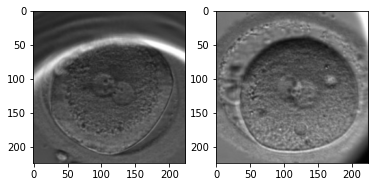

In [37]:
print("Test Images")
print()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, len(images))

for i, image in enumerate(images):
  ax[i].imshow(image)


Correspondent Heatmaps



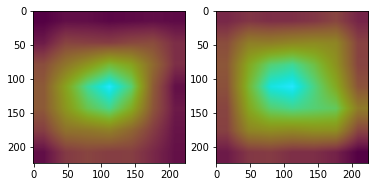

In [38]:
print("Correspondent Heatmaps")
print()

fig, ax = plt.subplots(1, len(heatmaps))
for i, heatmap in enumerate(heatmaps):
  ax[i].imshow(heatmap)


Resulted Heatmaps superposed to images



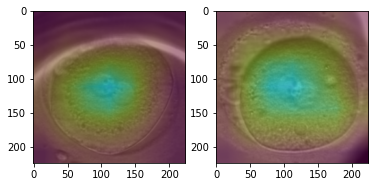

In [39]:
print("Resulted Heatmaps superposed to images")
print()

fig, ax = plt.subplots(1, len(outputs))
for i, output in enumerate(outputs):
  ax[i].imshow(output)
